## Mobile phone usability

In [72]:
import numpy as np
import pandas as pd 
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from termcolor import colored

In [73]:
file = pd.read_csv(r'c:\Users\massimiliano.canosi\Downloads\archive\mobile phone price prediction.csv')

In [74]:
file = file.drop(file.columns[0], axis=1)

In [75]:
file.describe()

,Rating,Spec_score
count,1370.000000,1370.000000
mean,4.374416,80.234307
std,0.230176,8.373922
min,3.750000,42.000000
25%,4.150000,75.000000
50%,4.400000,82.000000
75%,4.550000,86.000000
max,4.750000,98.000000


In [76]:
file.isnull().sum()

Name                   0
Rating                 0
Spec_score             0
No_of_sim              0
Ram                    0
Battery                0
Display                0
Camera                 0
External_Memory        0
Android_version      443
Price                  0
company                0
Inbuilt_memory        19
fast_charging         89
Screen_resolution      2
Processor             28
Processor_name         0
dtype: int64

In [77]:
data_info = file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1370 non-null   object 
 1   Rating             1370 non-null   float64
 2   Spec_score         1370 non-null   int64  
 3   No_of_sim          1370 non-null   object 
 4   Ram                1370 non-null   object 
 5   Battery            1370 non-null   object 
 6   Display            1370 non-null   object 
 7   Camera             1370 non-null   object 
 8   External_Memory    1370 non-null   object 
 9   Android_version    927 non-null    object 
 10  Price              1370 non-null   object 
 11  company            1370 non-null   object 
 12  Inbuilt_memory     1351 non-null   object 
 13  fast_charging      1281 non-null   object 
 14  Screen_resolution  1368 non-null   object 
 15  Processor          1342 non-null   object 
 16  Processor_name     1370 

In [78]:
file['Ram'] = file['Ram'].astype(str).str.extract('(\d+)').astype(float)
# file['Ram'].unique()

In [79]:
file['Battery'] = file['Battery'].astype(str).str.extract('(\d+)').astype(float)
# file['Battery'].unique()

In [80]:
file['Price'] = (file['Price'].apply(lambda x: x.replace(",",""))).astype(float)

In [81]:
file['company'] = file['company'].str.upper()

In [82]:
file['Android_version'].fillna(file['Android_version'].mode()[0], inplace=True)
file['Inbuilt_memory'].fillna(file['Inbuilt_memory'].mode()[0],inplace=True)
file['Processor'].fillna(file['Processor'].mode()[0],inplace=True)
file['Screen_resolution'].fillna(file['Screen_resolution'].mode()[0],inplace=True)
file['fast_charging'].fillna(file['fast_charging'].mode()[0],inplace=True)

In [83]:
def extract_res(res_str):

    import re 

    match = re.search(r'(\d+)\s*x\s*(\d+)', str(res_str))

    if match:
        return int(match.group(1)) * int(match.group(2))
    else:
        return None

In [84]:
file['Screen_resolution'] = file['Screen_resolution'].apply(extract_res)

------------------------------

## Top Companies

In [85]:
top_companies = file.pivot_table(index='company', values='Rating', aggfunc='mean').sort_values(by='Rating', ascending=False).reset_index()[:5]
top_companies

,company,Rating
0,COOLPAD,4.600000
1,GIONEE,4.470000
2,ASUS,4.447619
3,LENOVO,4.442857
4,TECNO,4.426923


## Top Products

In [86]:
top_products_df = file[file['company'].isin(top_companies['company'])]

top_products = top_products_df.pivot_table(index=['company', 'Name'], values='Rating', aggfunc='mean') \
                .sort_values(by=['Rating', 'company', 'Name'], ascending=False).reset_index()[:5]

top_products

,company,Name,Rating
0,LENOVO,Lenovo Legion Duel 3 5G,4.75
1,LENOVO,Lenovo K13 Pro,4.75
2,ASUS,Asus ZenFone 9,4.75
3,ASUS,Asus ROG Phone 8 Ultimate,4.75
4,ASUS,Asus ROG Phone 6 Pro 5G,4.75


#### Top Product per company

In [87]:
top_product_for_cm = file[file['company'].isin(top_companies['company'])]

top_product_per_cm = top_product_for_cm.pivot_table(index='company', values='Rating', aggfunc='idxmax').reset_index()

top_product_fin = top_product_for_cm.loc[top_product_per_cm['Rating']][['company', 'Name']]
top_product_fin

,company,Name
663,ASUS,Asus ZenFone 9
1343,COOLPAD,Coolpad Cool 30 Pro
701,GIONEE,Gionee M12 Pro
694,LENOVO,Lenovo K13 Pro
1220,TECNO,Tecno Phantom X2 Pro


------------------------------------

## Number of products for each company

In [88]:
products = file[['company', 'Name']]

prodcuts_pivot = products.pivot_table(index='company', values='Name', aggfunc='nunique').reset_index() \
                    .rename(columns={'Name': 'Product Count'})

px.treemap(prodcuts_pivot, names = 'company', path=['company'], values='Product Count', color='Product Count' \
           , hover_data={'Product Count': False}, title='#Products for Each Company')

--------------------------------

## AVG Price per Company

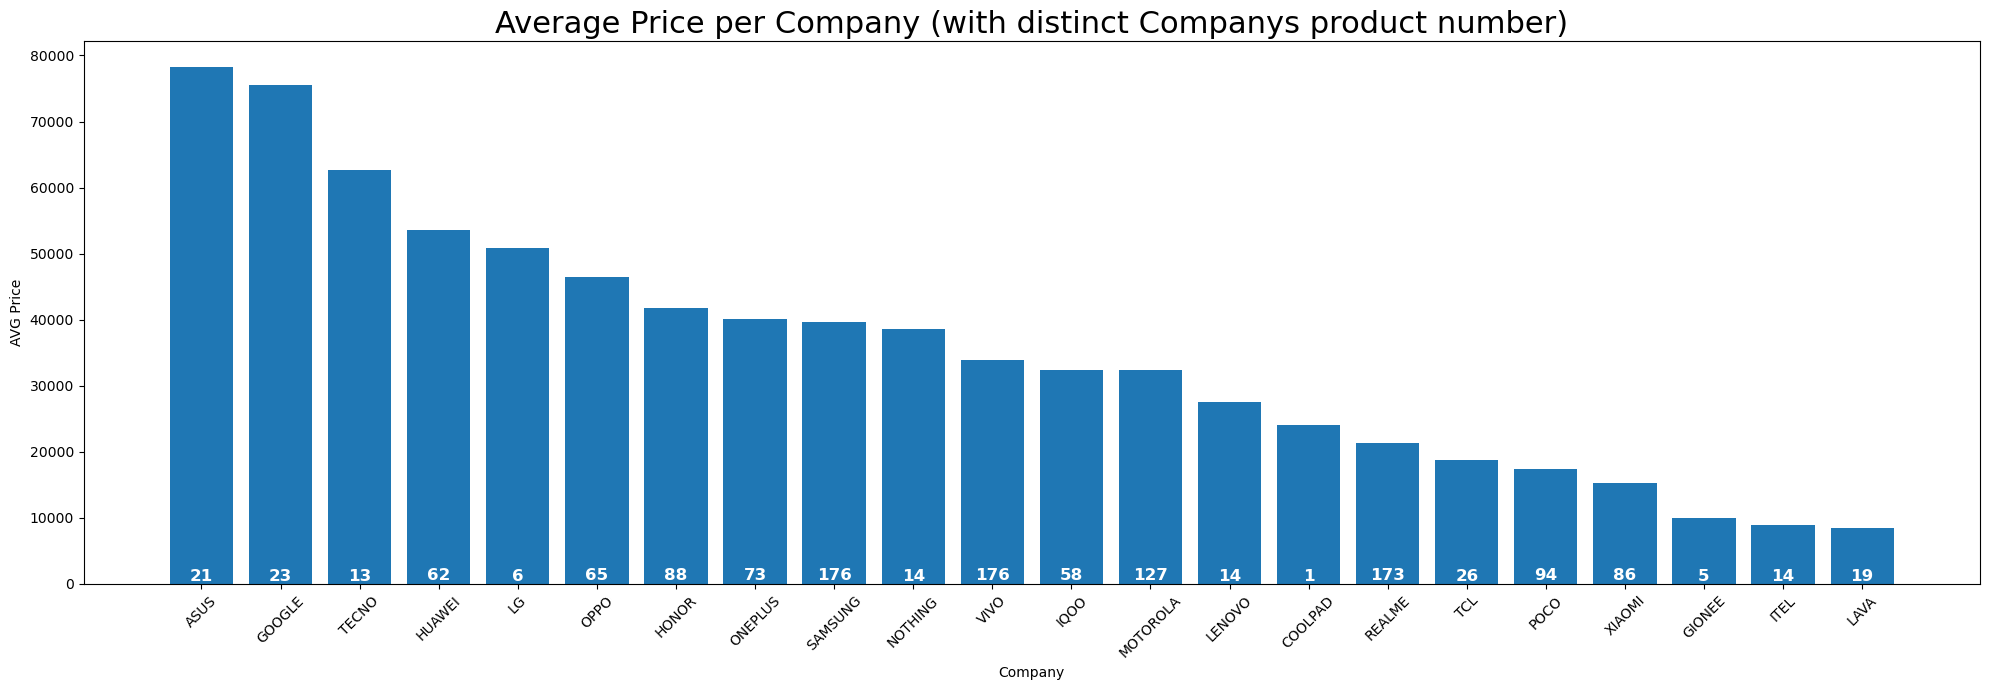

In [89]:
avg_price_cm = file.pivot_table(index='company', values=['Price', 'Name'], aggfunc={'Price': 'mean', 'Name':'nunique'}).sort_values(by='Price', ascending=False).reset_index()
avg_price_cm
fig, ax = plt.subplots(1,1, figsize=(20,7), tight_layout=True)
ax.set_title('Average Price per Company (with distinct Company''s product number)', fontsize = 22)
ax.set_xlabel("Company")
ax.set_ylabel("AVG Price")
ax.bar(avg_price_cm['company'], height= avg_price_cm['Price'])

for i, v in enumerate(avg_price_cm['Name']):
    ax.text(i, v, v , ha='center', va='bottom', fontsize=12, color='white', weight='bold')

plt.xticks(rotation=45) 
plt.show()

--------------------------------------

## Price Range per Company

In [90]:
boxplot_data = file[['Price', 'company']].sort_values(by='Price').copy()

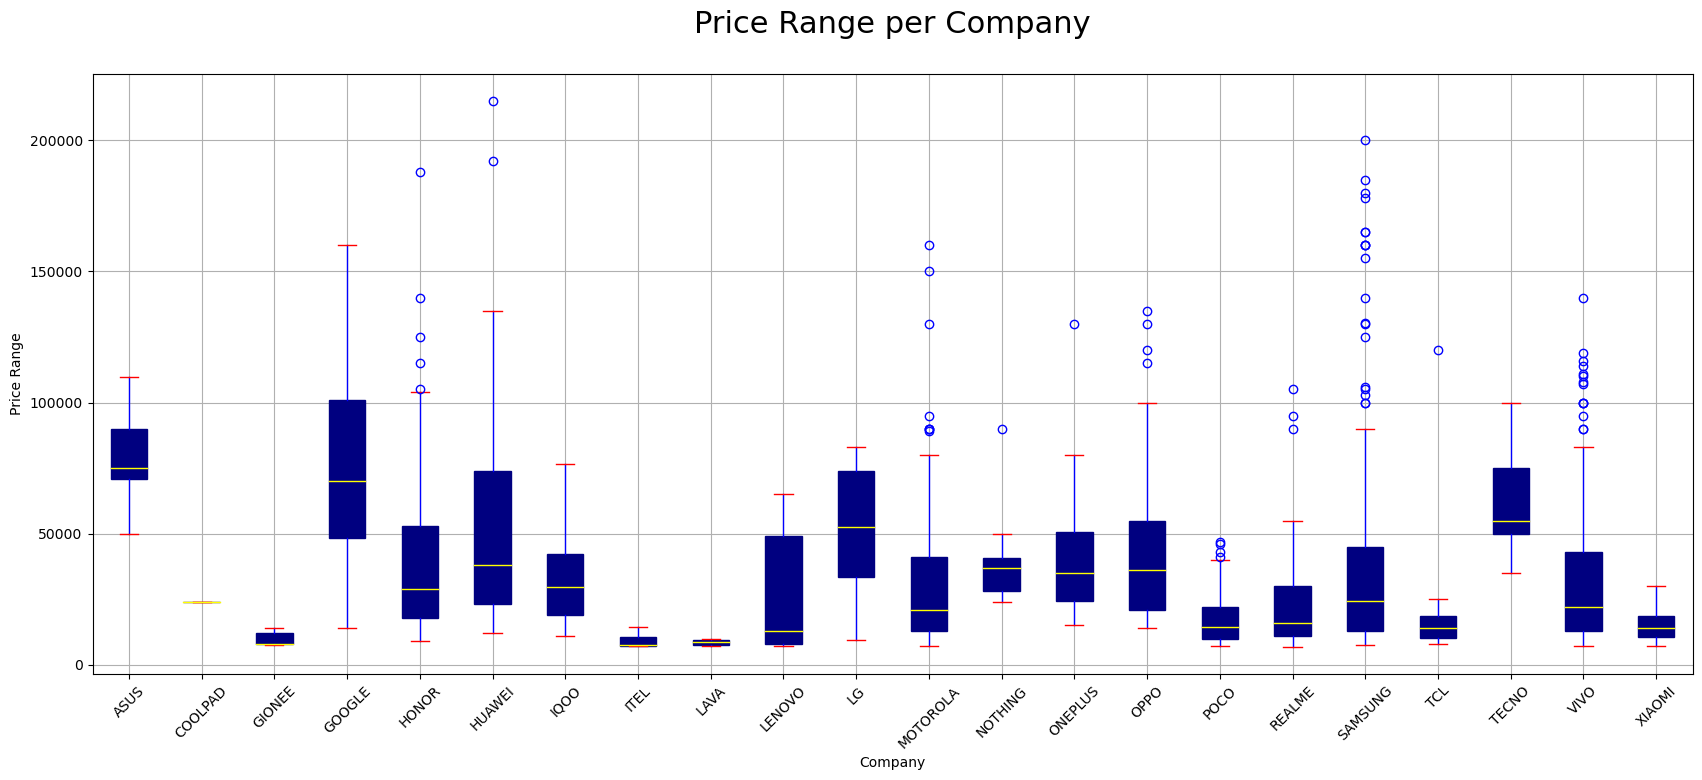

In [91]:
c = "red"
ax1 = boxplot_data.boxplot(column='Price', by='company', figsize=(20,8), patch_artist=True, boxprops=dict(facecolor='navy', color='navy'),
            capprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            flierprops=dict(color=c, markeredgecolor='blue'),
            medianprops=dict(color='yellow'))
ax1.set_ylabel('Price Range')
ax1.set_xlabel('Company')
ax1.set_title("")
plt.suptitle('Price Range per Company', fontsize = 22)
plt.xticks(rotation=45) 
plt.show()

### This graph can be used to understand the market price distribution in order to strategically price the products

---------------------------------------

### Rating vs Price

In [92]:
rating_v_price_df = file[['Name', 'Rating', 'Price']].copy()

px.scatter(x=file['Rating'], y=file['Price'], title="Rating vs Price", labels={'x': 'Rating', 'y': 'Price'})


####  This suggests that the rating parameter may not be a strong predictor of price in our analysis. When the prices increase, the ratings are not increasing that much.

------------------------------------------------

## Specs Importance

In [93]:
specs_imp_df = file[['Name', 'Spec_score', 'Price']].copy()

px.scatter(x=specs_imp_df['Spec_score'], y=specs_imp_df['Price'], title='Spec Score vs Price', labels={'x': 'Spec Score', 'y': 'Price'})

#### Spec Score will be used as a feature

---------------------------------------------

## AVG Score vs AVG Price vs Distinct Products

In [94]:
price_spec_df = file[['company', 'Name', 'Spec_score', 'Price']].copy()

In [95]:
price_spec_pivot = price_spec_df.pivot_table(index='company', values=['Name', 'Spec_score', 'Price'] \
                                                , aggfunc={'Name': 'nunique', 'Spec_score': 'mean', 'Price': 'mean'}).reset_index()

price_spec_pivot = price_spec_pivot.rename(columns = {'company': 'Company', 'Name': 'Distinct products', 'Spec_score': 'AVG Spec Score', 'Price': 'AVG Price'})

In [96]:
px.scatter(price_spec_pivot, x='AVG Spec Score', y='AVG Price', size='Distinct products', color='Company', title="AVG Spec Score and AVG Price vs Distinct Product, for Each Company ")

#### This plot represents the market. It can be used to find the best possible combination between specs and price to gain a competitive advantage. This graph can help in developing products that balance specs and pricing level to meet the demand.

#### The Spec Score, again, seems to be valuable as a feature for our analysis.

------------------------------------

## Data Formatting

In [99]:
def extract_display(display_str):
    import re

    match = re.search(r'(\d\.\d|\d+)', str(display_str))

    if match:
        return match.group()
    else:
        None
        
file['Display'] = file['Display'].apply(extract_display)

In [100]:
def extract_charging_info(ch_str):
    import re

    match = re.search(r'(\d+)', str(ch_str))

    if match:
        return match.group()
    else:
        None
        
file['fast_charging'] = file['fast_charging'].apply(extract_charging_info)

In [101]:
file['No_of_sim'] = file['No_of_sim'].apply(lambda x: x[:-2])

sim_mapping = {
    'No Sim Supported': 0, 
    'Dual Sim, 3G, VoLTE': 1,
    'Single Sim, 3G, 4G, VoLTE': 2,
    'Dual Sim, 3G, 4G': 3,
    'Dual Sim, 3G, 4G, VoLTE': 4,
    'Single Sim, 3G, 4G, 5G, VoLTE': 5,
    'Dual Sim, 3G, 4G, 5G, VoLTE': 6, 
    'Single Sim, 3G, 4G, 5G, VoLTE, Vo5G': 7,
    'Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G': 8,
}

file['No_of_sim_encoded'] = file['No_of_sim'].map(sim_mapping)

In [102]:
file['Inbuilt_memory'] = file['Inbuilt_memory'].str.strip()

def extract_inbMemory_info(proc_str):

    import re

    match = re.search(r'(\d+)', str(proc_str))

    if match:

        if "TB" in str(proc_str):

            match = int(match.group()) * 1000

            return match

        else:

            return match.group()
    
    else:
        return None
    
file['Inbuilt_memory'] = file['Inbuilt_memory'].apply(extract_inbMemory_info)

In [103]:
def front_camera_ext(cam_str):
    
    import re

    otp = re.search(r'([\d+\s\+MP]+Rear)', str(cam_str))
    if otp:
        return otp.group()
    else:
        return None

In [105]:
file['Rear Camera'] = [None] * len(file['Camera'])
file['Front Camera'] = [None] * len(file['Camera'])

try:

    for i,v in enumerate(file['Camera']):
        # REAR CAMERA
        first_part = v.split(";")[0]
        intermediate = re.findall(r'(\d+)', str(first_part))
        # FRONT CAMERA
        second_part = v.split(";")[1]
        second_int = re.findall(r'(\d+)', str(second_part))

        # MEGAPIXELS SUM
        intermediate_sum = sum([int(num) for num in intermediate])
        second_int_sum = sum([int(num) for num in second_int])

        # UPDATE COLUMN VALUE   
        file.loc[i, 'Rear Camera'] = intermediate_sum
        file.loc[i, 'Front Camera'] = second_int_sum

except Exception as e:

    print(colored(f"Exception for {v}", color='yellow', attrs=['bold']))

Exception for Foldable Display, Dual Display


## Correlation Heatmap

Text(0.5, 1.0, 'Correlation with Price')

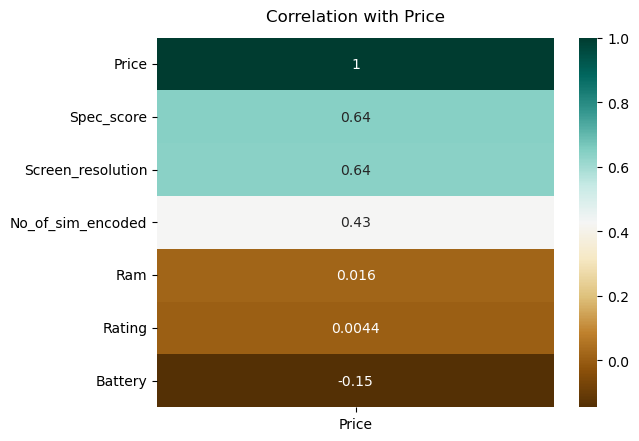

In [109]:
correlation = file.corr(numeric_only=True)[['Price']].sort_values(by='Price', ascending=False)
heatmap1 = sns.heatmap(correlation, annot=True, cmap='BrBG')
heatmap1.set_title('Correlation with Price', fontdict={'fontsize':12}, pad=12)

## Feature Importance

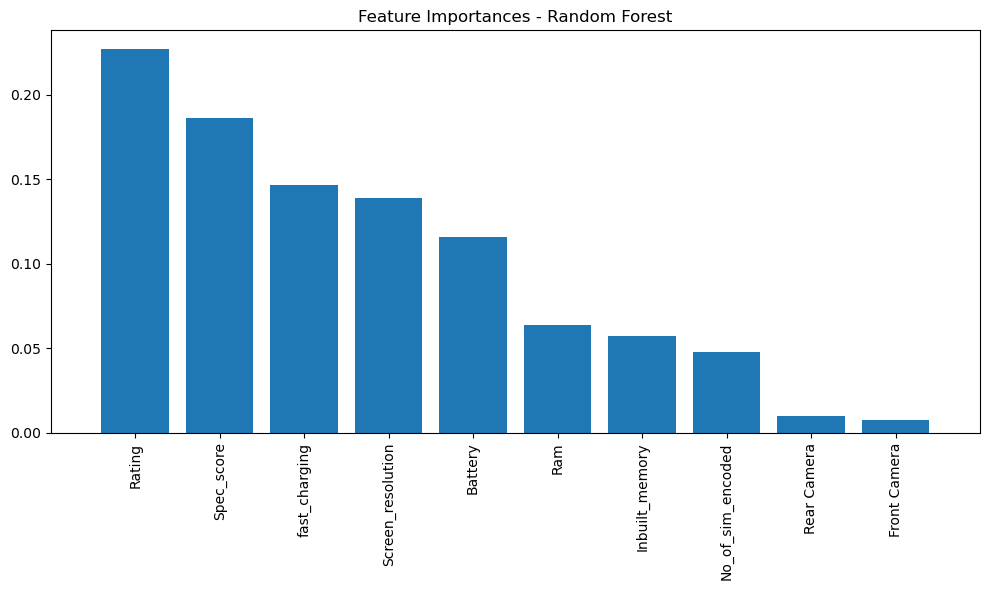

In [124]:
from sklearn.ensemble import RandomForestClassifier  
rf = RandomForestClassifier() 
X_new = file[['Rating', 'Spec_score', 'Ram', 'Battery', 'Inbuilt_memory', 'fast_charging', 'Screen_resolution', 'No_of_sim_encoded', 'Rear Camera', 'Front Camera']].copy()
X_fin = X_new.fillna(0)
rf.fit(X_fin, y)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

feature_labels = X_fin.columns  # Assuming X is a pandas DataFrame

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_fin.shape[1]), importances[indices], align="center")
plt.xticks(range(X_fin.shape[1]), feature_labels[indices], rotation=90)
plt.xlim([-1, X_fin.shape[1]])
plt.tight_layout()
plt.show()

## Linear Regression

(0.0, 227120.51810758113)

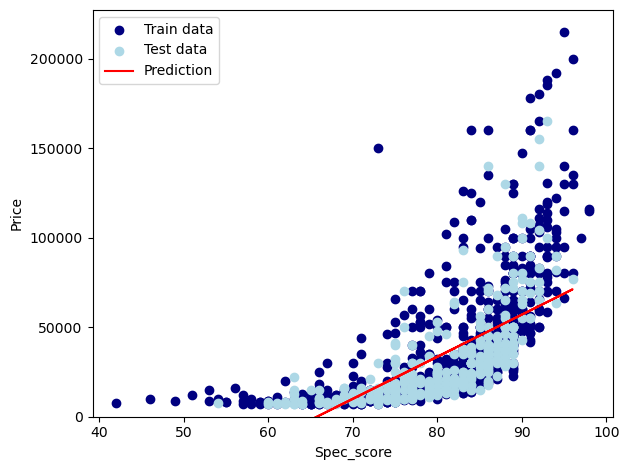

In [106]:
features = ['Spec_score']
X = file[features]
y = file['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, train_size=0.75)

model = LinearRegression()
model.fit(X_train, y_train)

################################
# b=model.intercept_
# w=model.coef_
# formula = w * X_train + b
################################

y_pred_train1 = model.predict(X_train)
y_pred_test1 = model.predict(X_test)

plt.scatter(X_train, y_train,c='navy', label='Train data')
plt.scatter(X_test, y_test, c='lightblue', label='Test data')
plt.plot(X_test, y_pred_test1, c='red', label='Prediction')
plt.xlabel('Spec_score')
plt.ylabel('Price')
plt.tight_layout()
plt.legend()
plt.ylim(0)

#### The scatter plot and regression red line illustrate the predictive power of the "Spec_score" feature on pricing. 
#### Let's add more parameters.

-------------------------------

In [116]:
file.head(1)

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,No_of_sim_encoded,Rear Camera,Front Camera
0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE",4.0,6000.0,6.6,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,9999.0,SAMSUNG,128,25,2600640.0,Octa Core Processor,Exynos 1330,6,52,13
